# FINM 250 Homework 1
## TA Solutions

# Part 2

### 1.a

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the adjustment to be 12; in python, the convention
# is to use all caps for global constants.
ADJ = 12

rets = pd.read_excel(
    "../data/multi_asset_etf_data.xlsx",
    sheet_name="excess returns",  # Specify the sheet name
    index_col=0,  # Set the index to the first column in the excel sheet
    parse_dates=[
        0
    ],  # Parse the dates from the first column to turn them into datetime objects
)

# Sanity check to make sure the data is loaded correctly
rets.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2011-02-28,0.007027,0.042120,-0.000027,0.035908,0.014763,-0.001674,0.045614,0.040556,0.002993,0.035147,0.007618
2011-03-31,0.008755,0.026909,0.063224,-0.023555,0.000752,-0.001218,-0.010607,0.016995,0.005849,0.000448,0.012231
2011-04-30,0.048760,0.045514,0.027283,0.056214,0.015932,0.018369,0.046589,0.058627,0.018989,0.028917,0.023735
2011-05-31,-0.012945,-0.051124,-0.028800,-0.021461,0.001933,0.025654,0.010733,-0.040965,0.000600,-0.010615,0.003259
2011-06-30,0.000230,-0.042318,-0.009027,-0.011781,-0.005378,-0.004716,-0.030733,-0.042254,-0.010449,-0.016542,0.007876


In [2]:
# Build a dictionary to store the summary statistics, note that
# in pandas you *generally* want to avoid building DataFrames iteratively,
# ie. by appending rows and columns to a DataFrame one at a time, since
# there is a big performance hit.


def performance_summary(rets, adj_factor=12):
    # Here, we use the keyword argument adj_factor to adjust the
    # annualization factor, which, since in this course we will
    # mainly deal with monthly data, is set to 12 by default.

    summary = {}
    summary["Annualized Mean"] = rets.mean() * adj_factor
    summary["Annualized Volatility"] = rets.std() * np.sqrt(adj_factor)
    summary["Annualized Sharpe Ratio"] = (
        summary["Annualized Mean"] / summary["Annualized Volatility"]
    )
    return pd.DataFrame(summary, index=rets.columns)


# Since part b asks to find the best and worst Sharpe Ratios, we can
# use the .sort_values method to sort the DataFrame by the Sharpe Ratio.
metrics = performance_summary(rets).sort_values(
    "Annualized Sharpe Ratio", ascending=False
)
metrics.style.format("{:.4f}")

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
SPY,0.1281,0.1428,0.8971
HYG,0.0414,0.0759,0.5449
IYR,0.0749,0.1687,0.4441
PSP,0.0926,0.2134,0.4338
EFA,0.0618,0.1509,0.4094
TIP,0.0205,0.0511,0.4011
QAI,0.0193,0.0491,0.3938
IEF,0.0164,0.0634,0.2586
EEM,0.0293,0.1762,0.1665
DBC,-0.0053,0.1666,-0.0318


### 1.b

We see that SPY has the best Sharpe ratio, with a value of 0.9. This is somewhat expected, given the incredible bull-run that SPY had from 2009-2022, and then again from late 2022 to early 2025. HYG (high-yield corporate bonds) has the second best, at 0.54. BWX has the worst Sharpe ratio, at -0.093. Second worst is DBC, with a Sharpe ratio of -0.032.

### 2.a

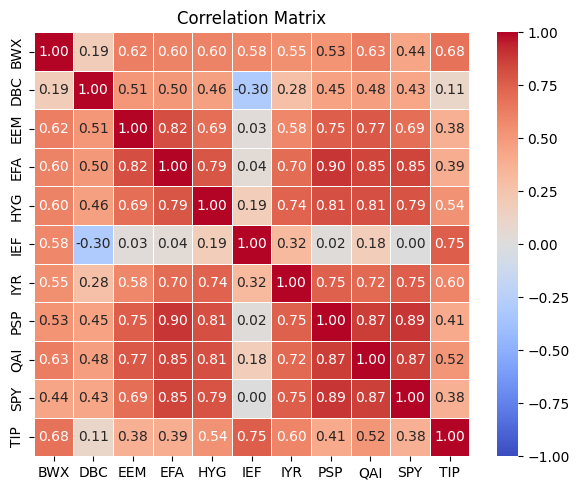

In [3]:
corr_matrix = rets.corr()

# Plot the correlation matrix using seaborn's heatmap function, there are a lot of arguments here,
# so do not worry about understanding them, simply calling sns.heatmap() with the corr_matrix
# is enough to get the job done.


def plot_corr_matrix(corrs):
    return sns.heatmap(
        corrs,  # The correlation matrix
        annot=True,  # Annot means include the correlation values in the heatmap
        cmap="coolwarm",  # The color scheme to use
        vmin=-1,
        vmax=1,  # Specify the max and min values for the color scheme, otherwise they will
        # be set to the min and max values of the correlation matrix, which is not
        # particularly useful.
        linewidths=0.7,  # The width of the lines that will divide each cell, mainly an aesthetic choice,
        # but it does make the heatmap easier to read.
        annot_kws={
            "size": 10
        },  # Specify the size of the annotation text to avoid overflow into adjacent cells.
        fmt=".2f",  # Specify the format of the annotation text, in this case, we want to round to 2 decimal places.
        # See: https://kuvapcsitrd01.kutztown.edu/~schwesin/fall20/csc223/lectures/Python_String_Formatting.html
    )


fig, _ = plt.subplots(figsize=(6, 5))
ax = plot_corr_matrix(corr_matrix)

# Specify the axis to plot on, this is NOT necessary, but it is good when using multiple subplots.
ax.set_title("Correlation Matrix")  # Set the title of the plot
fig.tight_layout()  # This adjusts spacing.

In [4]:
# Get highest and lowest correlations.
# Unstack the correlation matrix to get a series of all the correlations.
corr_series = corr_matrix.unstack()

# Next, we want to remove all the correlations of each asset with itself, since
# they will all be 1, and we are not interested in them.
corr_series = corr_series[corr_series != 1]
max_corr = corr_series.idxmax()
min_corr = corr_series.idxmin()

# Get the values.
max_corr_val = corr_series[max_corr]
min_corr_val = corr_series[min_corr]

# Note, the above code can also be written by using the DataFrame.agg method, which
# allows us to apply multiple functions to a DataFrame at once.
max_corr = corr_series.abs().agg(["idxmax", "max"]).T
min_corr = corr_series.abs().agg(["idxmin", "min"]).T
min_corr_raw = corr_series.agg(["idxmin", "min"]).T
max_corr, max_corr_val = max_corr["idxmax"], max_corr["max"]
min_corr, min_corr_val = min_corr["idxmin"], min_corr["min"]
min_corr_raw, min_corr_raw_val = min_corr_raw["idxmin"], min_corr_raw["min"]

# Print the results. Note how we use {:.2f} to round to 2 decimal places.
print(
    f"Max Corr (by absolute value): {max_corr[0]} and {max_corr[1]} with a correlation of {max_corr_val:.4f}"
)
print(
    f"Min Corr (by absolute value): {min_corr[0]} and {min_corr[1]} with a correlation of {min_corr_val:.4f}"
)
print(
    f"Min Corr (raw): {min_corr_raw[0]} and {min_corr_raw[1]} with a correlation of {min_corr_raw_val:.4f}"
)

Max Corr (by absolute value): EFA and PSP with a correlation of 0.8953
Min Corr (by absolute value): IEF and SPY with a correlation of 0.0008
Min Corr (raw): DBC and IEF with a correlation of -0.3002


Most of the assets have quite high correlations with each other, as shown by the heatmap. In fact, the only asset that displays negative correlations with the others is IEF. TIP is also on the lower end of the correlation spectrum.

#### 2.b

In [5]:
# This is quite an open ended question, since what really defines "outperformance" is
# somewhat subjective. We can look at the mean returns and sharpe ratio. You'll be better
# able to answer this question after we cover risk metrics.
#
# Domestic bond ETF is IEF, foreign is BWX.

# Get the mean returns and sharpe ratios.
bonds = metrics.loc[["TIP", "IEF", "BWX"]]

# Get the rank of the metrics.
bonds.loc[:, ["Rank Mean", "Rank Vol", "Rank Sharpe"]] = (
    metrics.rank(ascending=False)
    .loc[
        ["TIP", "IEF", "BWX"],
        ["Annualized Mean", "Annualized Volatility", "Annualized Sharpe Ratio"],
    ]
    .values
)

bonds.style.format("{:.4f}")

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio,Rank Mean,Rank Vol,Rank Sharpe
TIP,0.0205,0.0511,0.4011,7.0000,10.0000,6.0000
IEF,0.0164,0.0634,0.2586,9.0000,9.0000,8.0000
BWX,-0.0077,0.0828,-0.0932,11.0000,7.0000,11.0000


We see that TIP performs in about the middle of the pack, coming in 6th out of 11 in terms of Sharpe, and 8th out of 11 in terms of mean. However, it does have the second lowest volatility, which is a good thing.

I would argue that it outperforms both IEF and BWX. TIP has both a higher mean and lower volatility than the other two ETFs. So, yes, they have outperformed the other types of bonds.

In [6]:
# Check the correlations between the assets.
corr_matrix.loc[["TIP", "IEF", "BWX"], ["TIP", "IEF", "BWX"]]

,TIP,IEF,BWX
TIP,1.000000,0.754102,0.675151
IEF,0.754102,1.000000,0.580891
BWX,0.675151,0.580891,1.000000


### 2.c

The answer for this is "it depends". Although TIP perform better than the other two bond ETFs, they have a high correlation to both. So, in that sense they do expand the investment opportunity set. However, IEF is just 7-10 year treasuries, and thus is not meaningfully different from TIP, which are inflation-protected treasuries. Therefore, I would argue that Harvard should not consider them as their own asset class, but rather incorporate them into their existing treasury portfolio.

However, if we are limited to these choices of ETFs, rather than Harvard's thousands of assets, then yes, we should consider them their own asset class.

### 3.a, b

In [7]:
def tan_portfolio(mean_rets, cov_matrix):
    """
    Function to calculate tangency portfolio weights. Comes from the
    formula seen in class (Week 1).

    Args:
        mean_rets: Vector of mean returns.
        cov_matrix: Covariance matrix of returns.

    Returns:
        Vector of tangency portfolio weights.
    """
    inv_cov = np.linalg.inv(cov_matrix)
    ones = np.ones(mean_rets.shape)
    return (inv_cov @ mean_rets) / (ones.T @ inv_cov @ mean_rets)

def gmv_portfolio(cov_matrix):
    """
    Function to calculate the weights of the global minimum variance portfolio.

    Args:
        cov_matrix : Covariance matrix of returns.

    Returns:
        Vector of GMV portfolio weights.
    """
    try:
        cov_inv = np.linalg.inv(cov_matrix)
    except TypeError:
        cov_inv = np.linalg.inv(np.array(cov_matrix))

    one_vector = np.ones(len(cov_matrix.index))
    return cov_inv @ one_vector / (one_vector @ cov_inv @ (one_vector))


def mv_portfolio(mean_rets, cov_matrix, target=None, excess=True):
    """
    Function to calculate the weights of the mean-variance portfolio. If
    target is not specified, then the function will return the tangency portfolio.
    If target is specified, then we return the MV-efficient portfolio with the target
    return.
    
    **This assumes we have access to a risk-free asset**

    Args:
        mean_rets : Vector of mean returns.
        cov_matrix : Covariance matrix of returns.
        target (optional):  Target mean return. Defaults to None. Note: must be adjusted for
                            annualization the same time-frequency as the mean returns. If the
                            mean returns are monthly, the target must be monthly as well.
        excess (options): Whether or not we are using excess returns.

    Returns:
        Vector of MV portfolio weights.
    """
    w_tan = tan_portfolio(mean_rets, cov_matrix)

    if target is None:
        return w_tan
    
    elif not excess:
        w_gmv = gmv_portfolio(cov_matrix)
        delta = (target - mean_rets @ w_gmv) / (mean_rets @ w_tan - mean_rets @ w_gmv)
        return delta * w_tan + (1 - delta) * w_gmv
    else:
        ones = np.ones(mean_rets.shape)
        cov_inv = np.linalg.inv(cov_matrix)
        delta = (ones @ cov_inv @ mean_rets) / (mean_rets.T @ cov_inv @ ones) 
        return target * delta * w_tan


# Note: we are NOT annualizing here.
w_tan = mv_portfolio(rets.mean(), rets.cov())

w_tan_df = pd.DataFrame(w_tan, index=rets.columns, columns=["Tangency Portfolio"])

# Here, we use the display() function to show both the weights and the performance summary,
# without having to make two separate cells, and not mess up the formatting caused by print().
display(
    w_tan_df.sort_values(by="Tangency Portfolio", ascending=False).style.format(
        "{:.4f}"
    )
)

# Calculate the portfolio returns.
w_tan_rets = rets @ w_tan_df

# We could use linear algebra to directly calculate the
# portfolio statistics, but we will stick to using the
# performance_summary function for consistency, and also,
# if we want to calculate other risk metrics, we will need
# to use the performance_summary function.
tan_summ = performance_summary(w_tan_rets)
display(tan_summ.style.format("{:.4f}"))

,Tangency Portfolio
SPY,10.7298
IEF,9.0106
HYG,2.6349
TIP,1.3306
EEM,0.8536
EFA,0.3853
DBC,-0.1123
PSP,-1.7168
IYR,-2.3821
BWX,-6.1174


,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Tangency Portfolio,1.1551,0.7444,1.5517


### 4.a, b

In [8]:
# Drop TIPS.
rets_no_tips = rets.drop("TIP", axis=1)

# Calculate the tangency portfolio.
w_tan_no_tips = mv_portfolio(rets_no_tips.mean(), rets_no_tips.cov())

# Calculate the returns of the tangency portfolio.
w_tan_no_tips_rets = (rets_no_tips @ w_tan_no_tips).to_frame(
    "Tangency Portfolio (No TIPS)"
)

# Shock tips up by 0.0012 higher.
rets_mean_shocked = rets.mean()
rets_mean_shocked.loc['TIP'] += 0.0012
w_tan_tips_shocked = mv_portfolio(rets_mean_shocked, rets.cov())
w_tan_tips_shocked_rets = (rets @ w_tan_tips_shocked).to_frame('Tangency Portfolio (TIPS+0.0012)')

# Calculate the performance summary.
w_tan_no_tips_summ = performance_summary(w_tan_no_tips_rets)
w_tan_tips_shocked_summ = performance_summary(w_tan_tips_shocked_rets)

# Display weights
display(
    pd.concat(
        [
            w_tan_df,
            pd.Series(
                w_tan_no_tips,
                name="Tangency Portfolio (No TIPs)",
                index=rets_no_tips.columns,
            ),
            pd.Series(
                w_tan_tips_shocked,
                name='Tangency Portfolio (TIPS+0.0012)',
                index=rets.columns
            )
        ],
        axis=1,
    )
    .sort_values(by="Tangency Portfolio", ascending=False)
    .style.format("{:.2f}")
)

pd.concat([w_tan_no_tips_summ, tan_summ, w_tan_tips_shocked_summ], axis=0).T.style.format("{:.4f}")

,Tangency Portfolio,Tangency Portfolio (No TIPs),Tangency Portfolio (TIPS+0.0012)
SPY,10.73,14.66,3.10
IEF,9.01,13.36,0.57
HYG,2.63,3.74,0.48
TIP,1.33,nan,3.91
EEM,0.85,1.22,0.15
EFA,0.39,0.42,0.33
DBC,-0.11,-0.05,-0.24
PSP,-1.72,-2.28,-0.61
IYR,-2.38,-3.17,-0.86
BWX,-6.12,-8.32,-1.84


,Tangency Portfolio (No TIPS),Tangency Portfolio,Tangency Portfolio (TIPS+0.0012)
Annualized Mean,1.5709,1.1551,0.3480
Annualized Volatility,1.0133,0.7444,0.2398
Annualized Sharpe Ratio,1.5503,1.5517,1.4514


Excluding TIPS:

It, of course, has a lower Sharpe (but only by a little bit -- 1.5503 vs 1.5517). The reason for this is that adding assets **cannot** decrease the Sharpe ratio of the tangency portfolio. This is because if an asset contributes nothing, it will just have 0 weight in the tangency, so the best we can do is maintain an equal portfolio when we remove an asset. However, if the asset that we remove has non-zero weight, then it must decrease the Sharpe of the tangency.

What is interesting is that the mean return is ~42% higher, and the volatility is ~26% higher. Additionally, the weights are actually pretty similar, they agree in sign in all cases (long/short), and the magnitudes are also similar. The biggest change is QAI.

Shocking TIPS:

The Sharpe ratio of the tangency portfolio has fallen to 1.45. Notably, the mean has reduced as lot and so has the volatility. Although the weights still agree on sign, the sizes have changed quite a bit, for instance QAI went from -13 to -4, and SPY went from ~11 to 3 (QAI from 9 to 0.57). This is expected given that we are inverting a covariance matrix that is somewhat close to singular, so small changes in the mean can lead to large changes in the weights.

Does this imply TIPS expand the opportunity set?

No. This doesn't at all imply TIPS expand the opportunity set. Based on the correlation to existing assets, and the marginal performance drop when excluded from the universe, I do not think TIPS are a meaningfully seperate asset class. My recommendation would be to simply bundle them within the existing US treasury portfolio, rather than a standalone asset class.

# Part 3

In [9]:
# Calculate the equal weighted portfolio.
w_eq = np.ones(len(rets.columns)) / len(rets.columns)

# Rescale to fit to target return of 0.01.
w_eq = w_eq * (0.01 / (rets.mean() @ w_eq))

# Calculate the returns of the equal weighted portfolio.
w_eq_rets = (rets @ w_eq).to_frame("Equally Weighted")

# Risk parity portfolio.
w_rp = np.array(1 / np.diag(rets.cov()))

# Again, rescale to fit to target return of 0.01.
w_rp = w_rp * (0.01 / (rets.mean() @ w_rp))

# Calculate the returns of the risk parity portfolio.
w_rp_rets = (rets @ w_rp).to_frame("Risk Parity")

# Calculate the MV portfolio
w_mv_targ = mv_portfolio(rets.mean(), rets.cov(), target=0.01)
w_mv_targ_rets = (rets @ w_mv_targ).to_frame("MV Portfolio")

# Calculate performance summaries.
w_eq_summ = performance_summary(w_eq_rets)
w_rp_summ = performance_summary(w_rp_rets)
w_mv_targ_summ = performance_summary(w_mv_targ_rets)

w_comp = pd.DataFrame(
    np.array([w_eq, w_rp, w_mv_targ]).T,
    index=rets.columns,
    columns=["Equally Weighted", "Risk Parity", "MV"],
)

w_comp["Tangency"] = w_tan_df

# Concat and display.
display(w_comp.style.format("{:.4f}"))
pd.concat([w_eq_summ, w_rp_summ, w_mv_targ_summ], axis=0).T.style.format(
    "{:.4f}"
)

,Equally Weighted,Risk Parity,MV,Tangency
BWX,0.2546,0.4332,-0.0612,-6.1174
DBC,0.2546,0.1070,-0.0011,-0.1123
EEM,0.2546,0.0957,0.0085,0.8536
EFA,0.2546,0.1304,0.0039,0.3853
HYG,0.2546,0.5151,0.0263,2.6349
IEF,0.2546,0.7378,0.0901,9.0106
IYR,0.2546,0.1044,-0.0238,-2.3821
PSP,0.2546,0.0652,-0.0172,-1.7168
QAI,0.2546,1.2331,-0.1362,-13.6160
SPY,0.2546,0.1455,0.1073,10.7298


,Equally Weighted,Risk Parity,MV Portfolio
Annualized Mean,0.1200,0.1200,0.0116
Annualized Volatility,0.2697,0.2635,0.0074
Annualized Sharpe Ratio,0.4450,0.4555,1.5517


It's very different. For starters, both the tangency and the target portfolio have long/short positions. The equally weighted and risk parity ones don't. Moreover, all of the weights are quite a bit smaller in the equally weighted and risk parity portfolios. The tangency and target portfolios are much more concentrated in their top 3 and bottom 3 assets. This also makes sense since by shorting assets, you can have much bigger magnitudes of weights (that still sum to 1) than if you only go long.

Both portfolios have worse Sharpe ratios than the target MV portfolio. This is to be expected given that by definition the tangency maximizes sharpe, and the target portfolio maximizes sharpe subject to a target return. The equally weighted weighted and risk parity portfolios have much higher volatility than the target MV portfolio. They also have very similar Sharpe ratios and volatilities and, identical mean returns.

This is somewhat unexpected given that by the risk-parity definition, the weight of an asset is inversely proportional to the volatility, so I would have expected it to have lower volatilility. However, this makes sense if we consider that the main factor is the covariances, which risk-parity does not account for at all.